# Project : Suplmental Kmeans

## Introduction

This is a suplemental part of the project. The idea is to implement k-means clustering for the iris data set.


## References

https://www.datacamp.com/tutorial/k-means-clustering-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157156374951&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=733936221293&utm_targetid=aud-1832882613722:dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=1007877&utm_content=&accountid=9624585688&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gclid=Cj0KCQjwv_m-BhC4ARIsAIqNeBtcqQxamZLbu_HZzz-KqeYXnvGMhbiqEAkhefWZntcQgx3jKP1Yy2IaAuKgEALw_wcB

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


Import the necessary libraries to support project

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Import Analysis project

In [68]:
import analysis as an

Load the iris dataset

In [69]:
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")


Data loaded successfully


Import the kmeans module from sklearn

In [70]:
# Standard Scaler is used to scale the data to a common scale
from sklearn.preprocessing import StandardScaler
# PCA is used to reduce the number of features to 2 for visualization
from sklearn.decomposition import PCA
# Kmeas is used to cluster the data
from sklearn.cluster import KMeans

Plot a scatter plot of the data  

To visualise the features , see if we can see obvious clustering

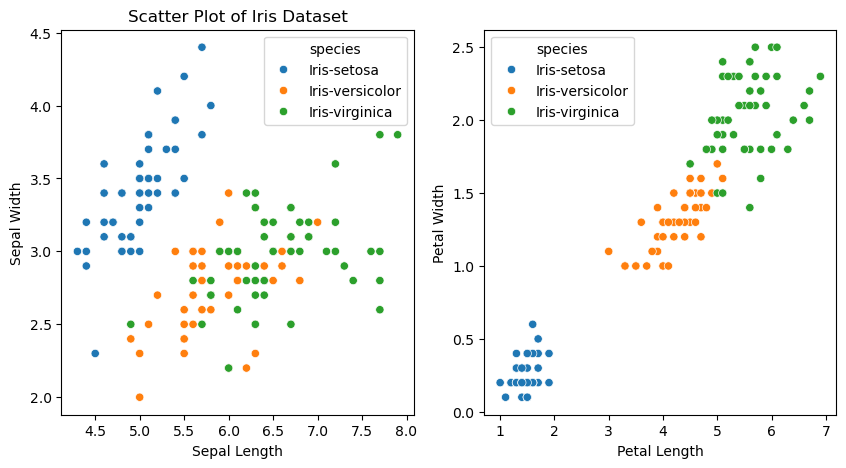

In [71]:
fig , ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Scatter Plot of Iris Dataset")
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df_iris, ax=ax[0])
ax[1].set_xlabel("Petal Length")
ax[1].set_ylabel("Petal Width")
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df_iris, ax=ax[1])
plt.show()

Do a box Plot of the data

Again to see if we can see obvious clustering . The box plot will show if the data is distributes compactly and if there are any outliers and the potential impact on the clustering

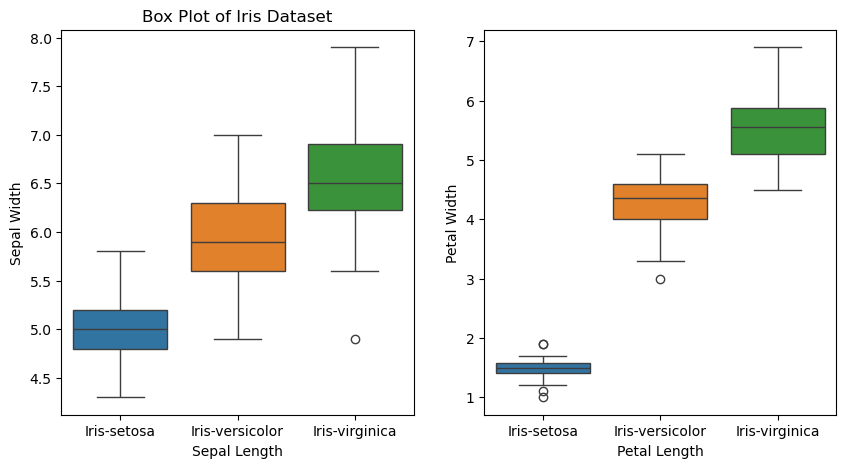

In [72]:
# do boxplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Box Plot of Iris Dataset")
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
sns.boxplot(x="species", y="sepal_length", data=df_iris,hue='species', ax=ax[0])
ax[1].set_xlabel("Petal Length")
ax[1].set_ylabel("Petal Width")
sns.boxplot(x="species", y="petal_length", data=df_iris,hue='species', ax=ax[1])
plt.show()

Standardize the data for kmeans

That means all features are the same scale. This prevents bias towards features with larger scales.

Bring down to the standard scale ( mean = 0, std = 1)

In [ ]:
# Standard 
scaler = StandardScaler()
# Standardize the data
# Fit the StandardScaler to the data only  interested in the features
X = df_iris.iloc[:, :-1].values
scaler.fit(X)
X_scaled = scaler.transform(X)



Do a scatter plot and box plot of the scaled data

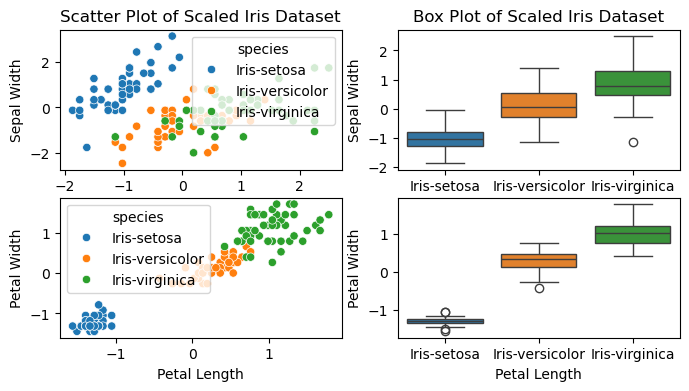

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4))
# scatter plot of the scaled data
ax[0,0].set_title("Scatter Plot of Scaled Iris Dataset")
ax[0,0].set_xlabel("Sepal Length")
ax[0,0].set_ylabel("Sepal Width")
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_iris["species"], ax=ax[0,0])
ax[1,0].set_xlabel("Petal Length")
ax[1,0].set_ylabel("Petal Width")
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=df_iris["species"], ax=ax[1,0])


ax[0,1].set_title("Box Plot of Scaled Iris Dataset")
ax[0,1].set_xlabel("Sepal Length")
ax[0,1].set_ylabel("Sepal Width")
sns.boxplot(x="species", y=X_scaled[:, 0], data=df_iris,hue='species', ax=ax[0,1])
ax[1,1].set_xlabel("Petal Length")
ax[1,1].set_ylabel("Petal Width")
sns.boxplot(x="species", y=X_scaled[:, 2], data=df_iris,hue='species', ax=ax[1,1])
plt.show()



Now apply RPA to reduce the data to 2D

In [75]:
RPA = PCA(n_components=2)
X_rpa = RPA.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {RPA.explained_variance_ratio_}")
df_rpa = pd.DataFrame(data=X_rpa, columns=["PC1", "PC2"])
# Add the species column to the dataframe
# the order is preserved so we can just add the species column
df_rpa["species"] = df_iris["species"]


Explained Variance Ratio: [0.72770452 0.23030523]


Plot the data in 2D   

A scatter and box plot of the data in 2D. This will show if the data is now more compact and if there are any outliers and the potential impact on the clustering

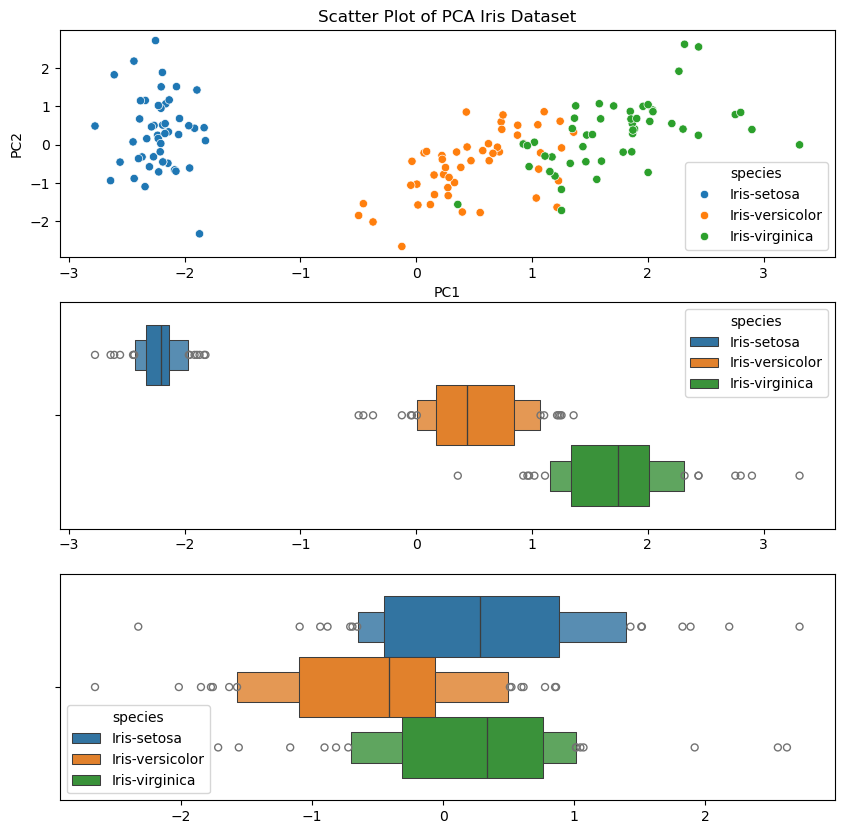

In [76]:
fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].set_title("Scatter Plot of PCA Iris Dataset")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax[0])
sns.boxenplot(x=X_rpa[:, 0], hue=df_iris["species"], ax=ax[1])
sns.boxenplot(x=X_rpa[:, 1], hue=df_iris["species"], ax=ax[2])
plt.show()

Now apply kmeans to the data


Cluster Centers: [[-2.22019328  0.29222482]
 [ 0.61198392 -0.79925263]
 [ 1.71890108  0.65217008]]
Inertia: 116.24247259315808
Number of Iterations: 7
Features: 2


c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


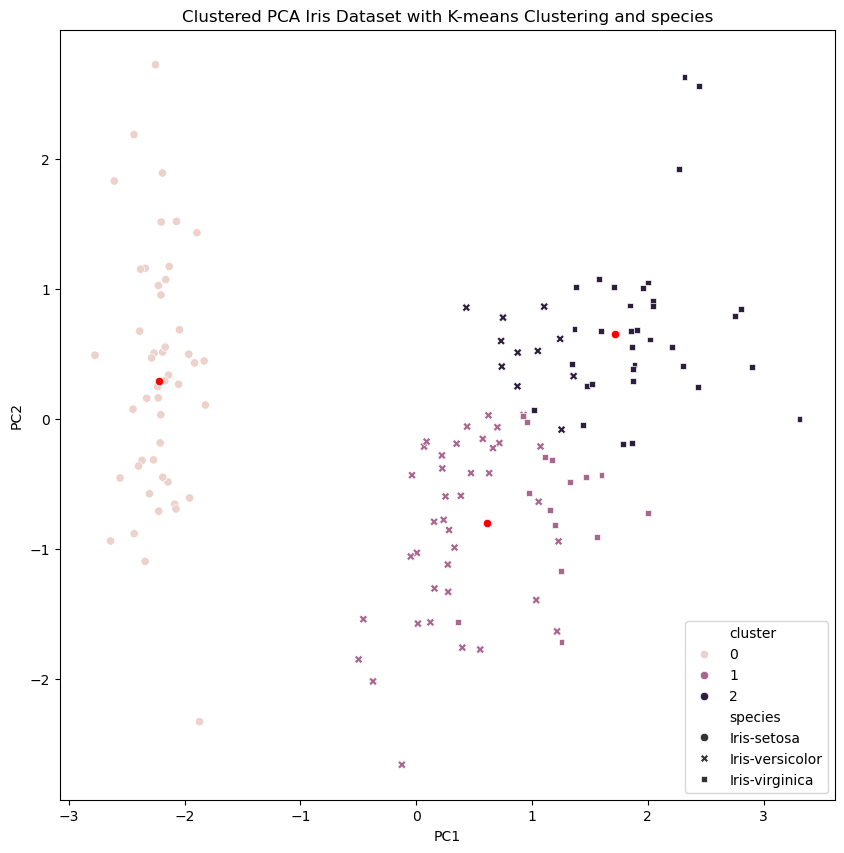

In [77]:
kmeans = KMeans(n_clusters=3, random_state=57, n_init='auto')
# n_init is the number of times the K-means algorithm will run with different centroid seeds
# the best result is selected

kmeans.fit(X_rpa)
print(f"Cluster Centers: {kmeans.cluster_centers_}")
print(f"Inertia: {kmeans.inertia_}")
print(f"Number of Iterations: {kmeans.n_iter_}")
print(f"Features: {kmeans.n_features_in_}")
#print(f"Labels: {kmeans.labels_}")
# Add labels to dataframe , these are the cluster numbers
df_rpa["cluster"] = kmeans.labels_
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title("Clustered PCA Iris Dataset with K-means Clustering and species")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_rpa["cluster"],style=df_rpa['species'], ax=ax)
# plot the cluster centers
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', ax=ax)
plt.show()

Do a kmeans plot of the data

c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cw171001\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

Text(0.5, 1.0, 'Elbow Method')

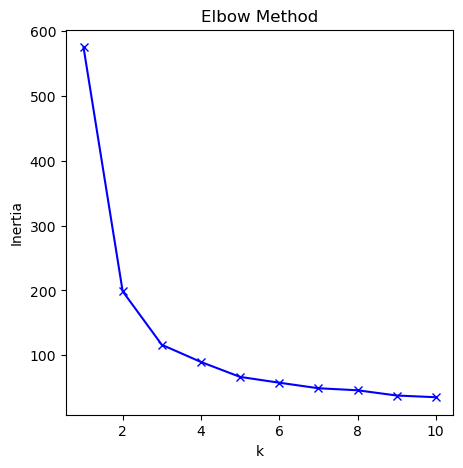

In [79]:
K = range(1, 11) # number of clusters
inertia = [] # list to store the inertia values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=57, n_init='auto');
    kmeans.fit(X_rpa)
    inertia.append(kmeans.inertia_);
# Plot the inertia values
plt.figure(figsize=(5, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')